<a href="https://colab.research.google.com/github/smarulandas/samuel-Marualanda/blob/main/SOLUCION_PRIMER_PARCIAL_2024-II-S%26S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO 1**

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de 5KHz entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua x(t) = 0.3cos(1000pi*t + (- pi) / 4) + 0.6sin(2000pi*t) + 0.1cos(11000pi*t - pi) Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal x(t).

 En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

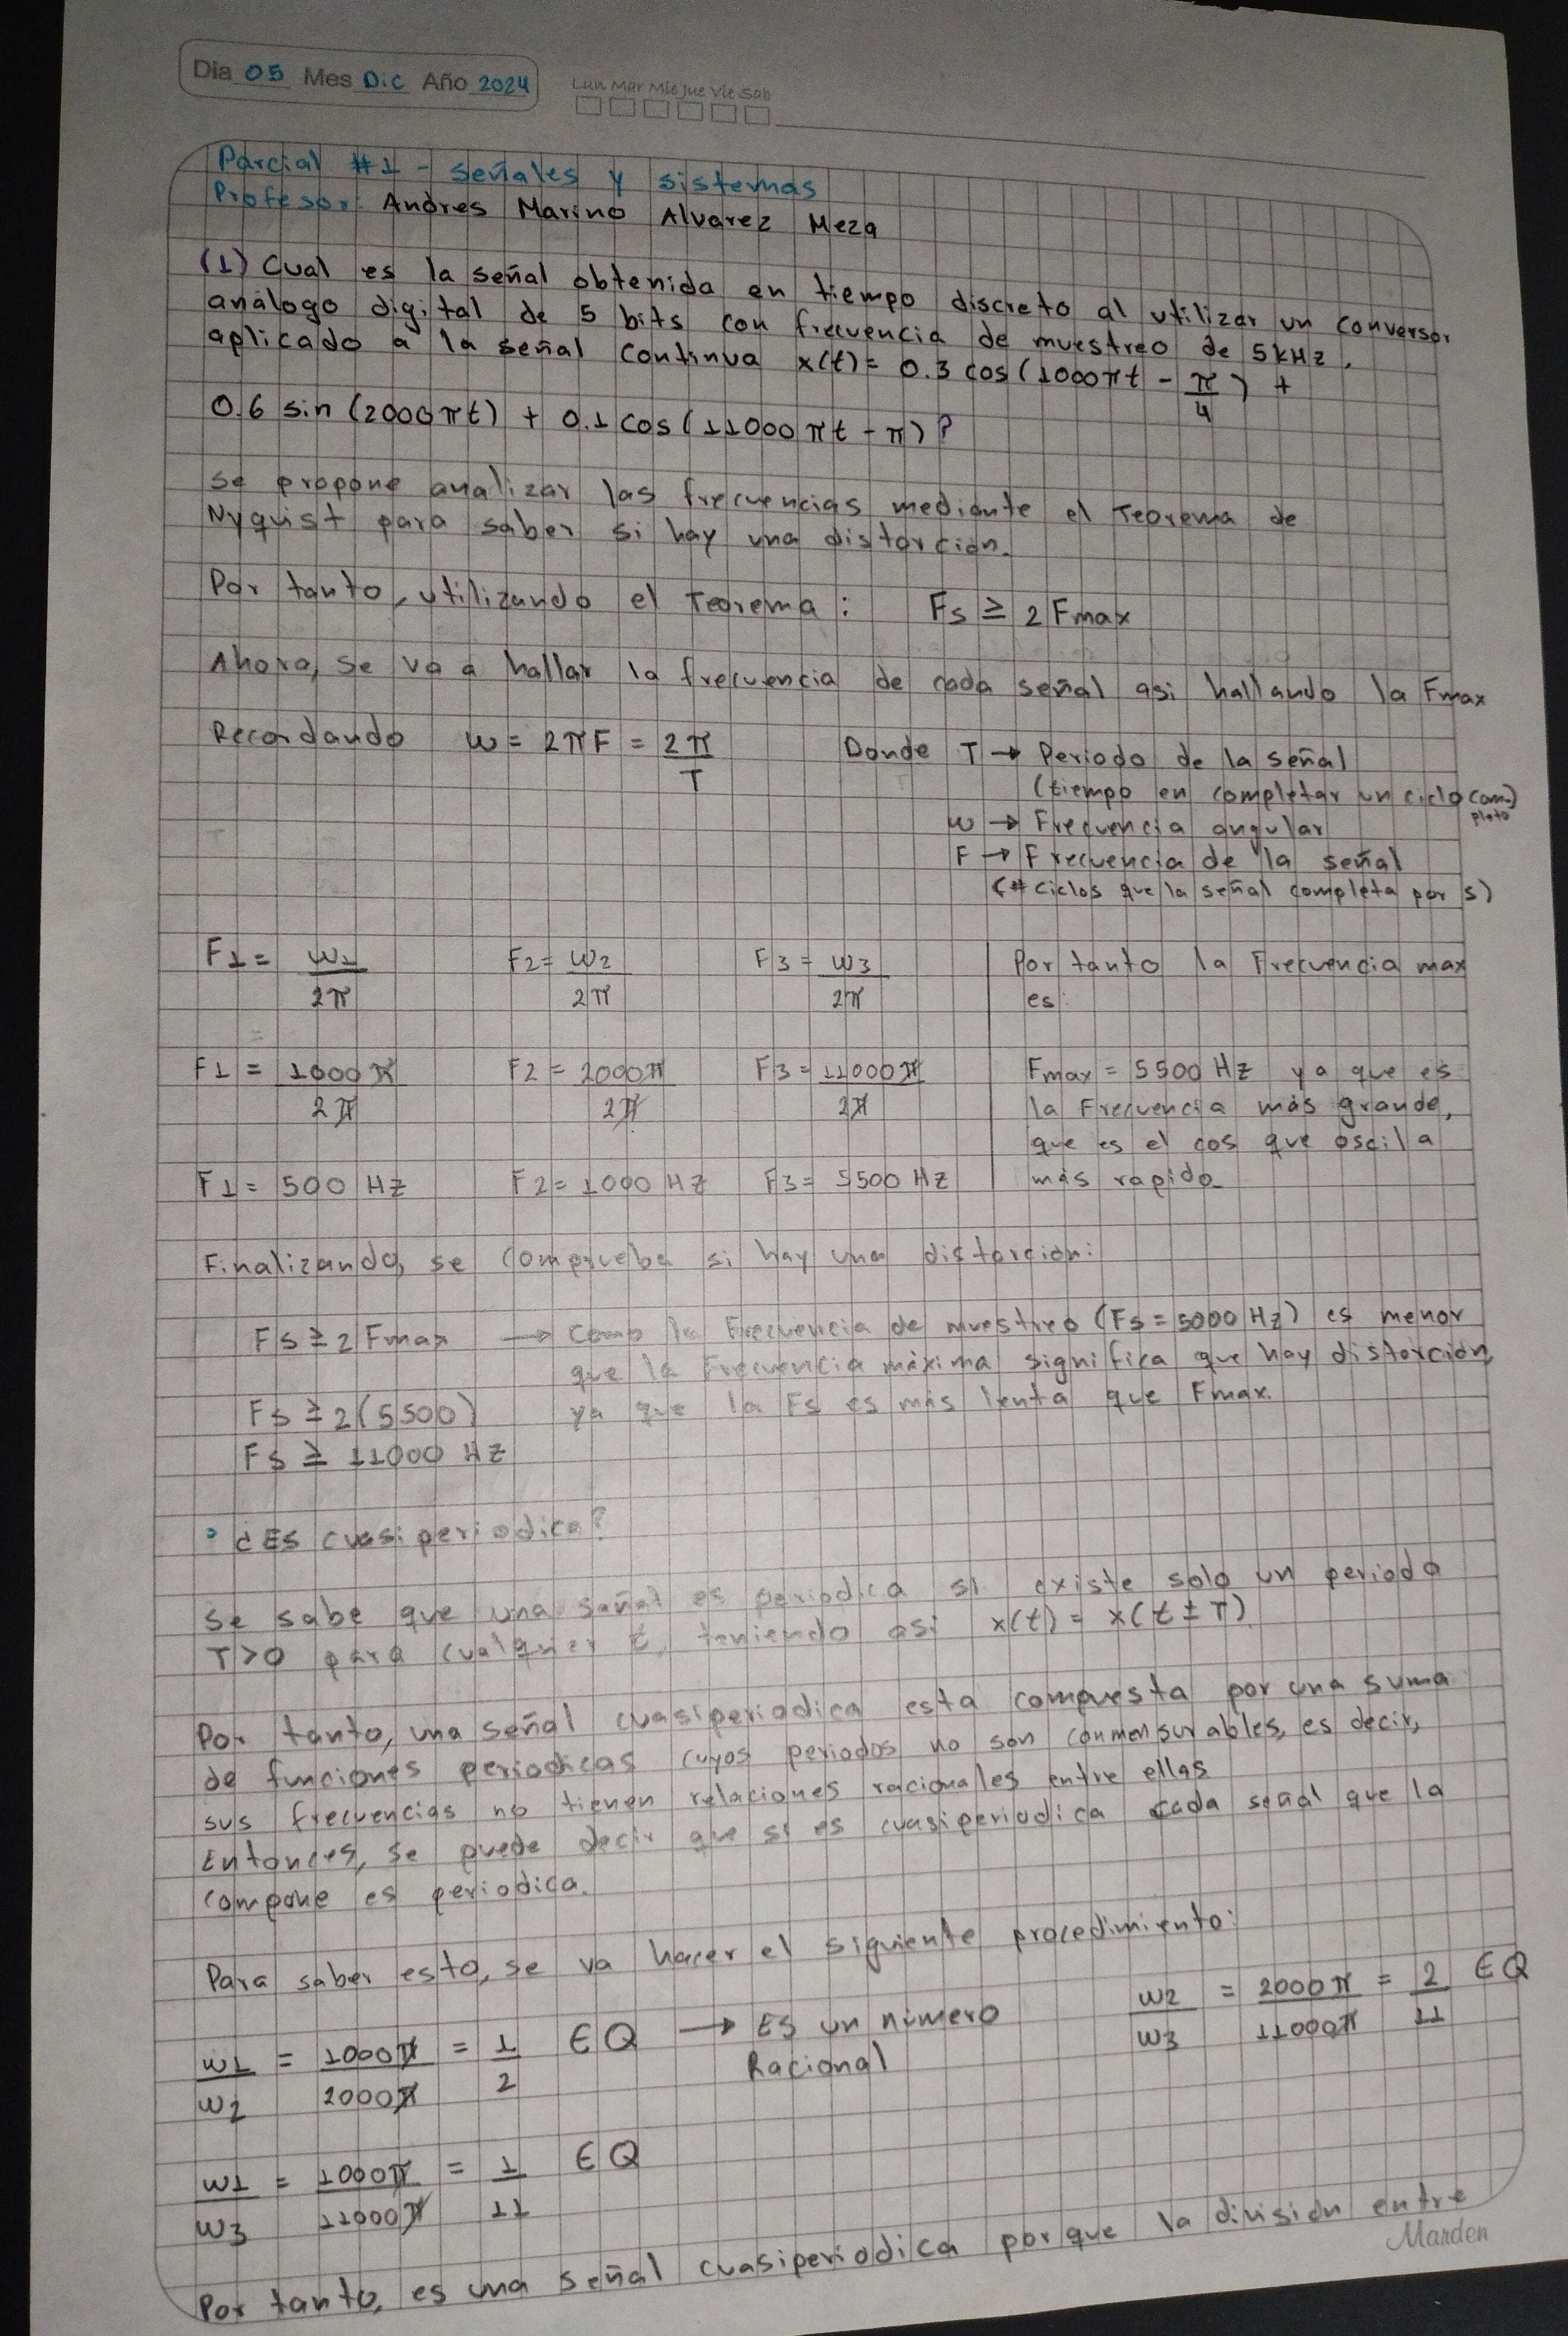

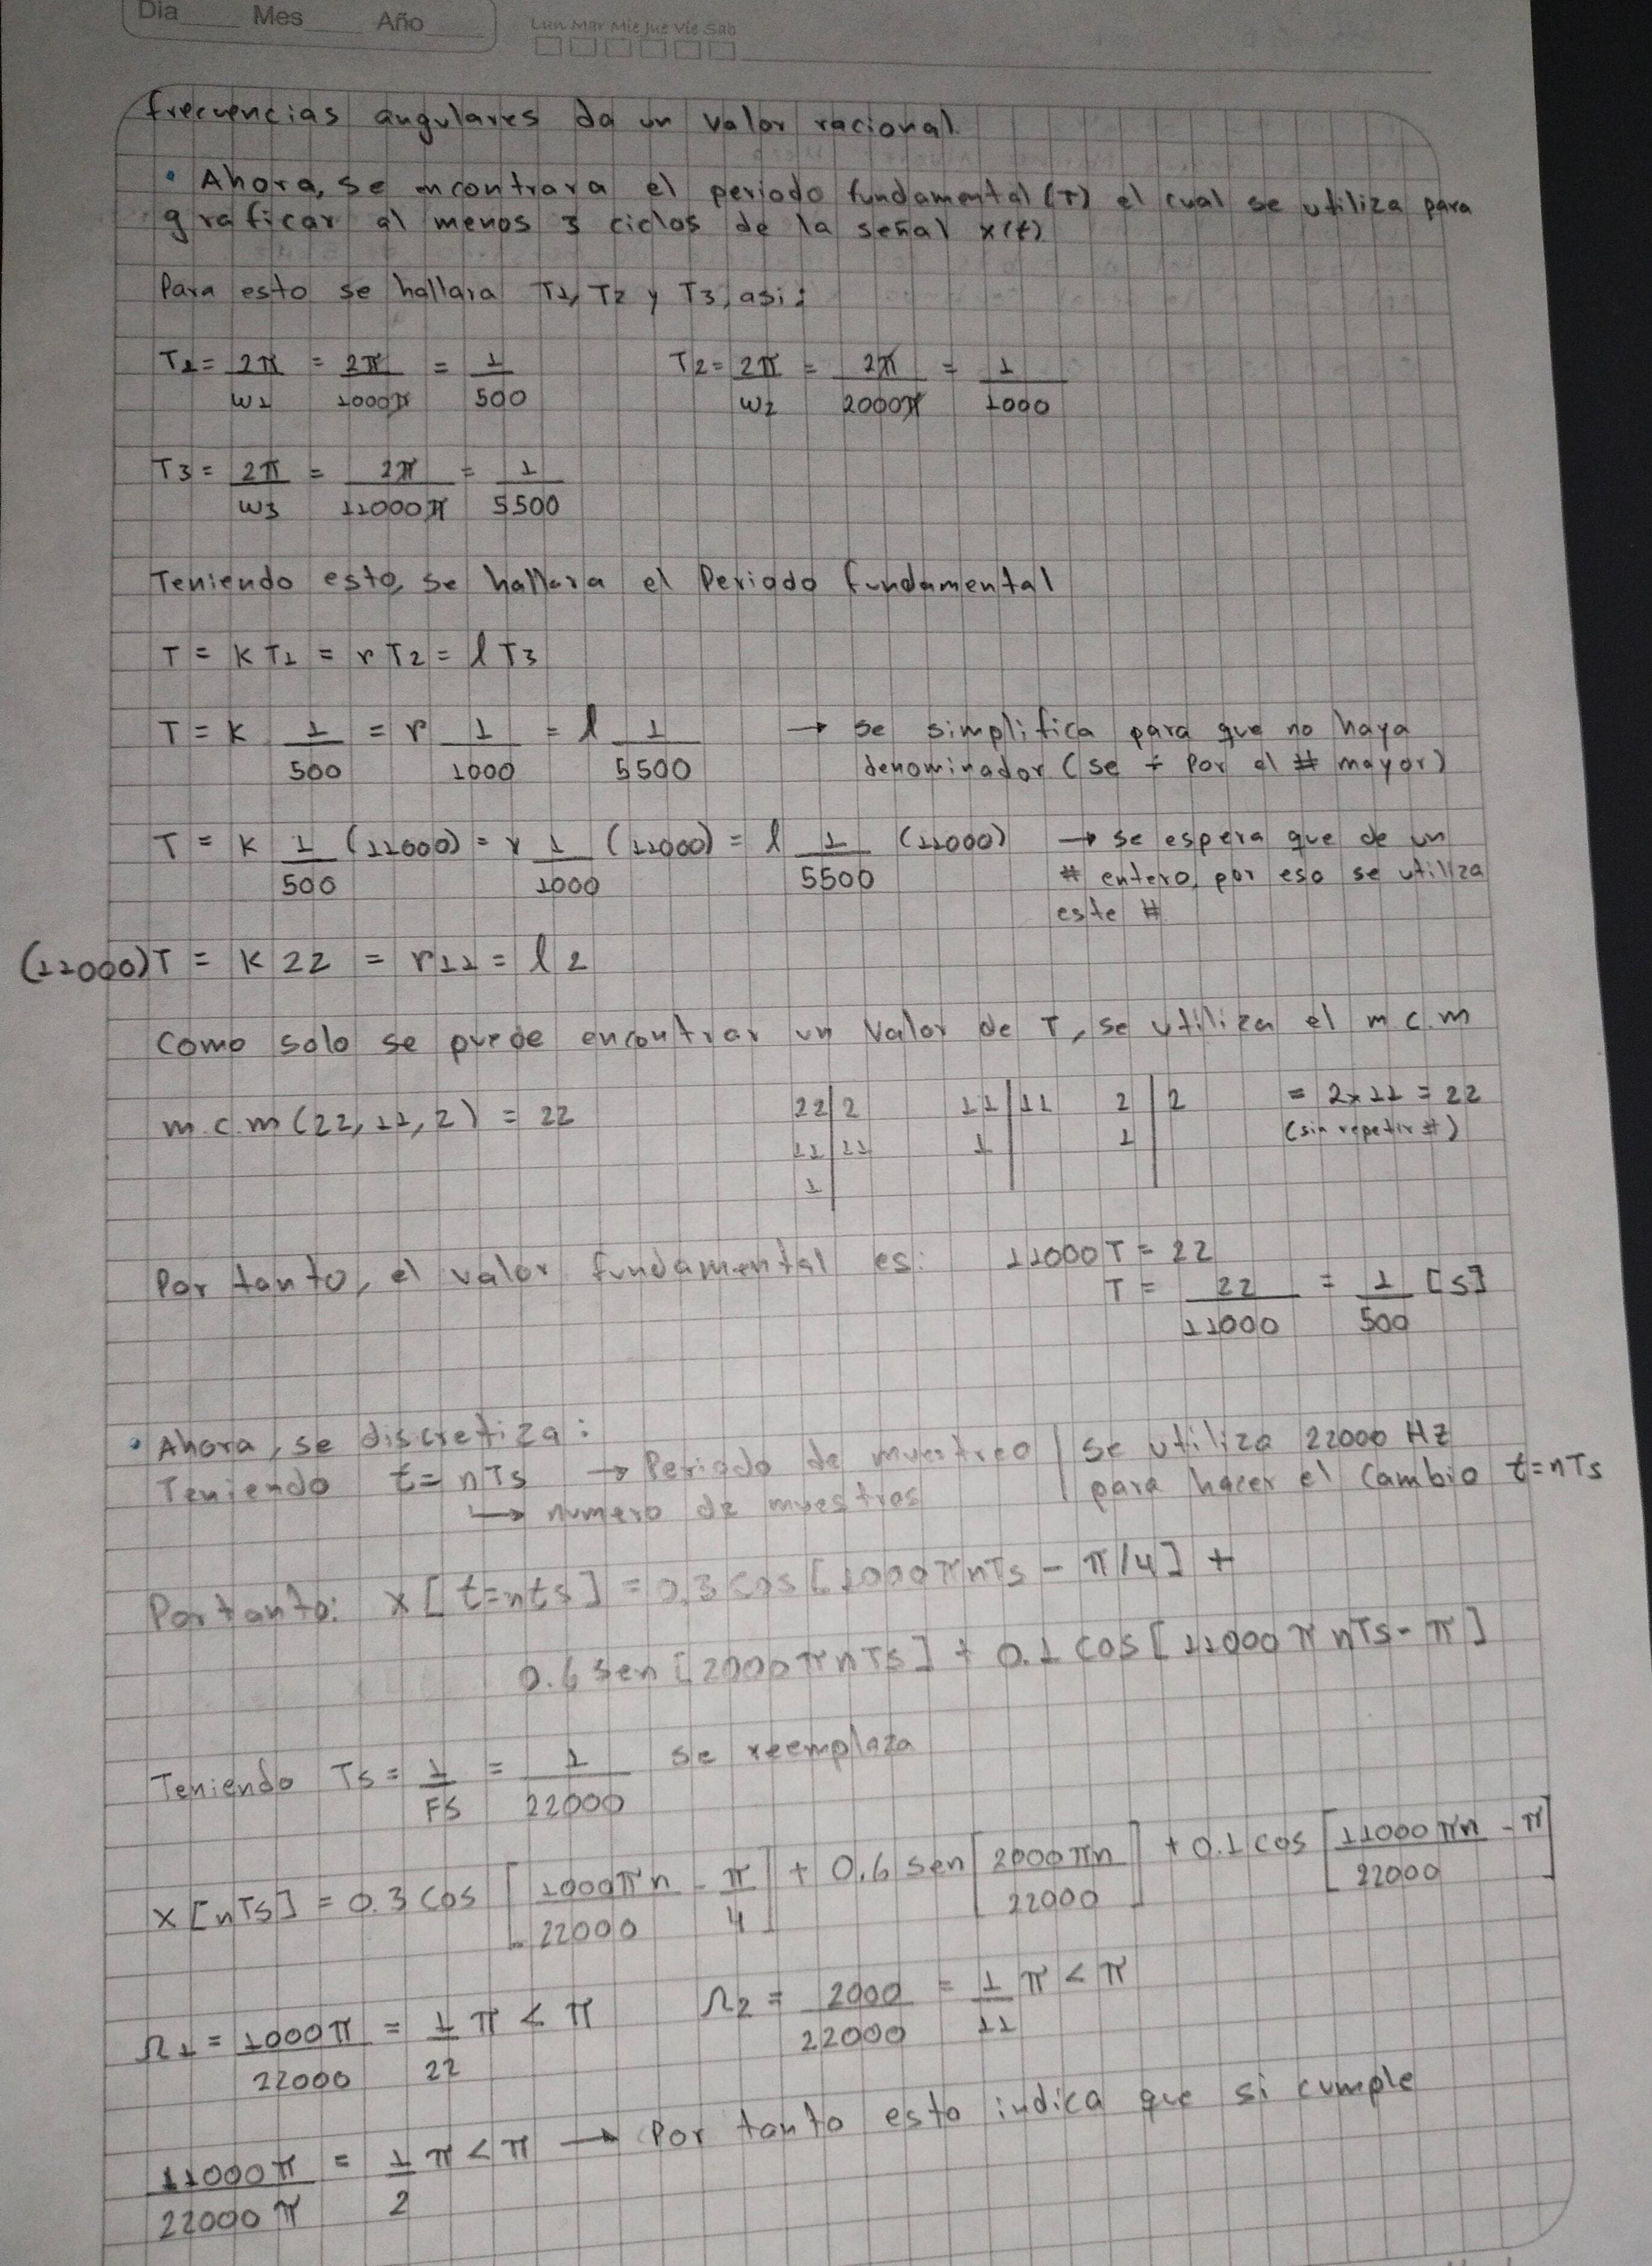

Ingrese el valor de la Frecuencia de muestreo: 11000


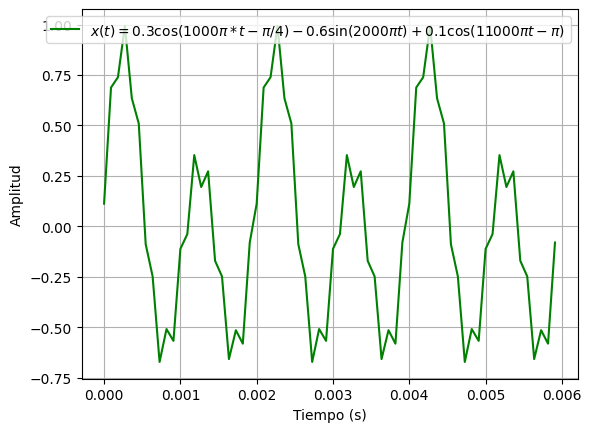

In [1]:
import numpy as np #Libreria para operaciones matematicas y integrales y derivadas. Con alias np para utilizar arreglos

import matplotlib.pyplot as plt #Libreria con alias plt para graficas

from scipy.spatial.distance import cdist #Libreria con alias cdist para calcular distancias entre puntos y entre conjuntos de puntos.

#x(t) = 0.3cos(1000pi*t + (- pi)/4) + 0.6sin(2000pi*t) + 0.1cos(11000pi*t - pi)  SEÑAL DADA

#Se define paramatros de la señal

#Datos señal 1(t)
A1 = 0.3 #Amplitud 1
w1 = 1000*np.pi #Frecuencia angular 1
T1 = (2*np.pi)/w1 #Periodo 1
f1 = w1/(2*(np.pi)) #Frecuencia 1
U1 = (-np.pi)/4 #Fase 1

#Datos señal 2(t)
A2 = 0.6 #Amplitud 2
w2 = 2000*np.pi #Frecuencia angular 2
T2 = 2*np.pi/w2 #Periodo 2
f2 = w2/(2*np.pi) #Frecuencia 2

#Datos señal 3(t)
A3 = 0.1 #Amplitud 3
w3 = 11000*np.pi #frecuencia angular 3
T3 = (2*np.pi)/w3 # Periodo 3
f3 = w3/(2*np.pi) #frecuencia 3
U3 = -np.pi #Fase 3

#Periodo señal cuasiperiodica T = mcm(T1,T2,T3) = 22

T = 1/500 #Periodo fundamental  (Tiempo que tarda en completar un ciclo
          #completo)

#Definir frecuencia muestreo segun nyquist

  #NOTA: Como se mostro anteriormente en la hoja parcial, se noto que el valor previsto de Fmax = 5500 Hz estaba incorrecto, por tanto se debe tener un valor Fs >= 11000 Hz.
  #Por tanto para este caso, se utilizara la frecuencia de muestreo Fs = 11000 Hz

#Fs = 2*max(f1,f2,f3) # (2*Fmax) = 11000 [Hz] Frecuencia de muestreo

Fmax = max(f1,f2,f3) #Frecuencia maxima de las 3 señales
Fs = float(input("Ingrese el valor de la Frecuencia de muestreo: "))

while Fs < (2*Fmax): #Condicion para que entre al ciclo while "Fs < (2*Fmax) - cuando ya no se cumple esta condicion se sale del while(minetras) "
    Fs = float(input("Ingrese de nuevo el valor de la frecuencia de muestreo, porque Fs <2*Fmax(f1,f2,f3)"))

Ts = 1/Fs #periodo de muestreo (distancia entre lineas verticales que aparecen dentro de un las "montañitas" estas es frecuencia de muestreo)

#Definir vector de tiempo

ti = 0 #Tiempo inicial
tf = 3*T #3 ciclos o periodos hacia adelante
tv = np.arange(ti,tf,Ts) #Tiempo de muestreo, inicia desde ti hasta tf, la diferencia entre cada numero es Ts.

#Creando la señal

x = A1*np.cos(w1*tv + U1) + A2*np.sin(w2*tv) + A3*np.cos(w3*tv + U3) #Señal que dio el ejercicio
plt.plot(tv,x,'g',label='$x(t) = 0.3\cos(1000π*t-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$') #$ -> Significa que pone dicha formula en latex. plot-> Grafico de lineas
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True) #Activar las lineas del fondo
plt.legend() #Es la que pone la etiqueta de "plt.plot"
plt.show()



In [ ]:
print(f1,f2,f3,Fs)

499.99999999999994 999.9999999999999 5499.999999999999 10999.999999999998


Ingrese el valor maximo de la señal: 3.3
Ingrese el valor minimo de la señal: -3.3


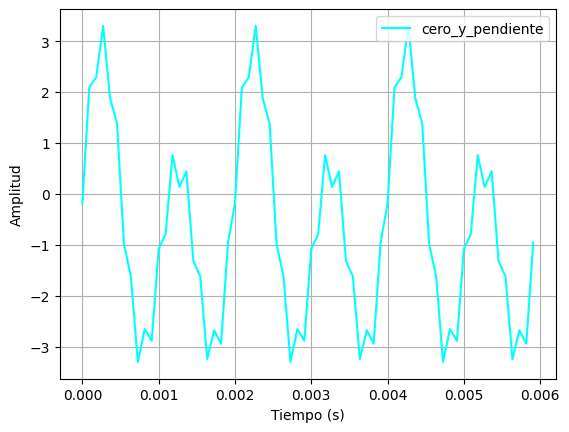

In [2]:
#Se digitaliza la señal

#NOTA: Siginifica que se utiliza el cero y pendiente. Esto se utiliza para acondicionar la señal, para este caso se tiene una amplitud de -0.75 a 1 [V] y se va a acondicionar a una amplitu de -3 a 3 [V]. Solo es en el eje y.

def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin) #Pendiente
  c = ymin - m*xmin #offset o desplazamiento vertical
  yv = m*x + c #Transformación lineal a cada valor de la señal x
  return yv

#Se restringe las condiciones del ejercicio

ymax = float(input("Ingrese el valor maximo de la señal: ")) #El Dato del ejercico era 3.3. Pero se pregunta el rango max de la señal.

ymin = float(input("Ingrese el valor minimo de la señal: ")) #El Dato del ejercico era -3.3. Pero se pregunta el rango min de la señal.

while ymax < ymin:
    ymax = float(input("Valor incorrecto de ymax debe ser mayor que ymin (ymax > ymin). Ingrese de nuevo el valor maximo de la señal: ")) #Pues el ymax no puede ser 2 y ymin = 5
    ymin = float(input("Ingrese de nuevo el valor minimo de la señal: "))


xcp = my_ceropen(x, ymin, ymax) #Nuevo array de los valores transformados de la señal original x
plt.plot(tv,xcp,'cyan',label='cero_y_pendiente')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


Escriba el numero de bits: 5


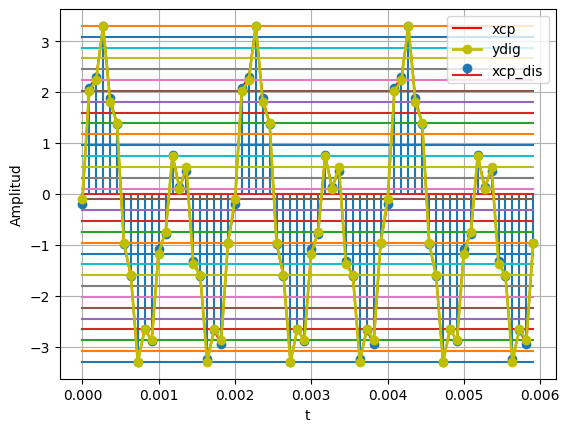

In [3]:
nbits = int(input("Escriba el numero de bits: ")) # 5 numero de bits propuestos en el ejercicio. Pero se va a preguntar al usuario el numero de bits.

num_est = 2**nbits #numero de estados de cuantificacion (en otras palabras, es poner mas lineas horizontales en la grafica(ultima))

vq = np.linspace(ymin,ymax,num_est) #vector llamado va con los niveles de cuantificacion

#Cuantización punto a punto

def my_cuantizador(yn, vq) :

  Ne = vq.shape[0]
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn)
  return vq[ind]

#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

#graficar señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua
plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# **EJERCICIO 2**

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

In [4]:
# cargar sistema propuesto en el ejercicio

FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-12 03:00:24--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 74.125.20.138, 74.125.20.102, 74.125.20.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-12 03:00:24--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s  

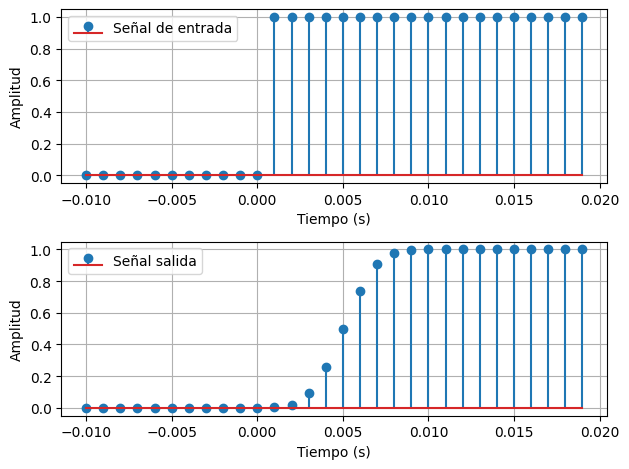

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u_one = np.heaviside(t,1) # función heaviside
y_u_one = my_system.predict(signal_u_one)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u_one, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u_one, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

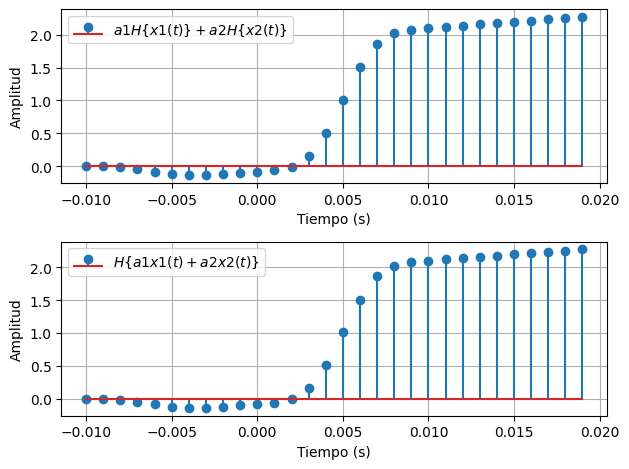

In [10]:
#Se determinara si el sistema es SLIT observando si cumple la linealidad y la invariancia en el tiempo

#Linealidad:  y(t)=H{a1x1(t)+a2x2(t)}=a1H{x1(t)}+a2H{x2(t)}
#Invariancia con el tiempo:  y(t)=H{x(t)};y(t−to)=H{x(t−to)}

#Se compara la linealidad del sistema con otra señal

fs = my_system.fs # Frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Vector de tiempo

a1 = 2 # Escalar 1
a2 = 3 # Escalar 2

signal_u_two = np.heaviside(t,1) # Función Heaviside (escalón unitario)
signal_u_scaled = a1*signal_u_two # Función Heaviside escalada por a1
y_u_two = my_system.predict(signal_u_two) # Respuesta del sistema a la función Heaviside

signal_v = np.sin(2*np.pi*t) # Función seno
signal_v_scaled = a2*signal_v # Función seno escalada por a2
y_v = my_system.predict(signal_v) # Respuesta del sistema a la función seno

signals_scaled= signal_u_scaled + signal_v_scaled # Suma de las señales escaladas
y_scaled = my_system.predict(signals_scaled)# Respuesta del sistema a la suma de las señales escaladas

P1 = a1*y_u_two + a2*y_v # Combinación lineal de las respuestas individuales para veririfar linealidad
P2 = y_scaled # Respuesta del sistema a la combinación lineal de las señales para veririfar linealidad

#Visualización de las señales
fig, axs = plt.subplots(2,1) #Crea una figura con dos subplots (uno encima del otro)
axs[0].stem(t, P1, label='$a1H\{x1(t)\}+a2H\{x2(t)\}$') #Grafica P1 como un diagrama de tallos (stem plot) en el primer subplot
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,P2, label='$H \{a1x1(t)+a2x2(t)\}$')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid() #Agrega una cuadrícula al segundo subpl
plt.tight_layout() #Ajusta el diseño de la figura para evitar superposiciones
plt.show()

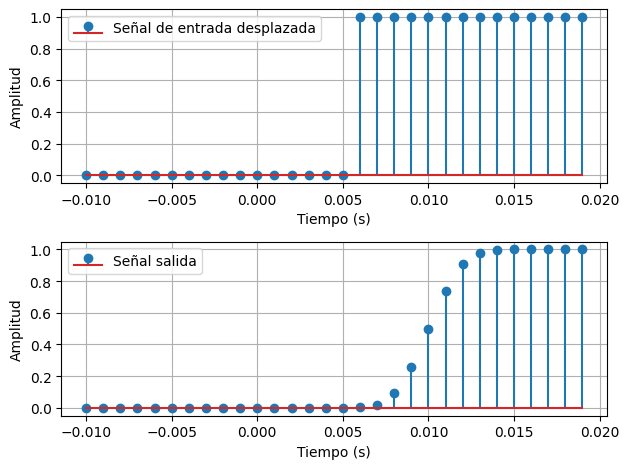

In [9]:
#Invariancia en el tiempo

fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  #Tiempo
to = 0.0050 #desplazamiento
signal_u_three = np.heaviside(t-to,1) #función heaviside desplazada
y_u_three = my_system.predict(signal_u_three) #respuesta al desplazamiento

#Visualización de las señales

fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u_three, label='Señal de entrada desplazada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u_three, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

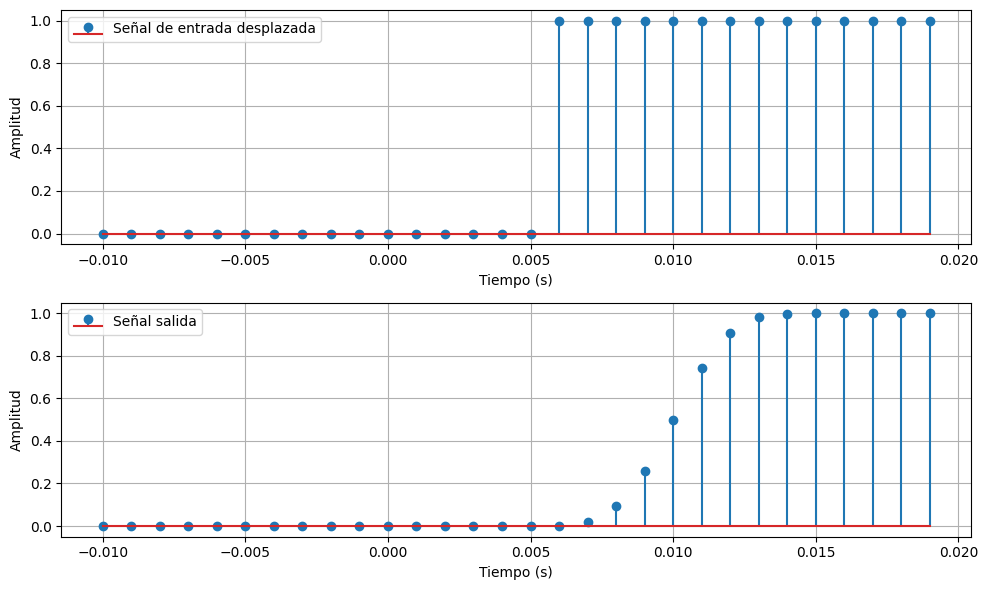

In [ ]:
#Dado que la señal es lineal e invariante en el tiempo, el siguiente paso es obtener su respuesta al impulso

t_adjusted = t[:-1] # lo usamos para que el vector tiempo sea compatible con la longitud de la respuesta impulso para esta parte utilice IA ya que no sabia el porque sucedia el problema que me generaba al creal la respuesta impulso, luego de entender el porque procedì a realizarlo

h_n = np.diff(y_u_one)  #encontramos la respuesta al impulso derivando la salida del sistema

#realizamos la grafica de la respuesta impulso
plt.figure()
plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Respuesta al impulso del sistema')
plt.show()


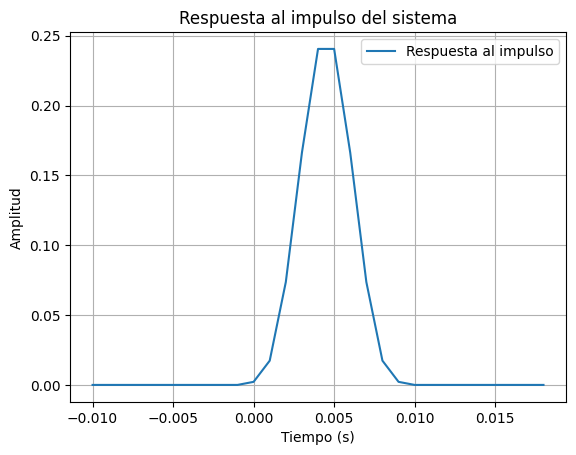

In [11]:
# Dado que se confirmó la linealidad e invariancia en el tiempo del sistema, procedemos a calcular su respuesta al impulso.

t_adjusted = t[:-1] #vector tiempo sea compatible con la longitud de la respuesta impulso. Se utilizo IA pero no entendi muy bien para que es :(
h_n = np.diff(y_u_one)  #Se obtiene la respuesta al impulso mediante la derivada de la respuesta al escalón unitario.

plt.figure() # Crea una nueva figura para la gráfica
plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid() # Activa la cuadrícula
plt.title('Respuesta al impulso del sistema')
plt.show()

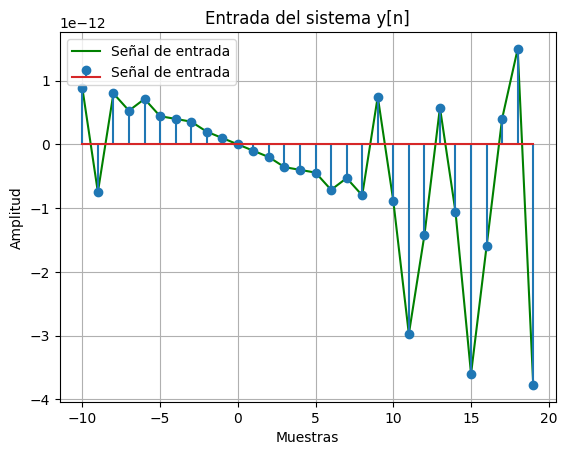

In [14]:
n = np.round(t*fs) #Arreglo n para nuestras muestras y lo redondeamos
x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n) #señal dada en el ejercicio

#Se grafica la señal de entrada
plt.figure()
plt.plot(n, x_n, 'g', label='Señal de entrada')
plt.stem(n, x_n, label='Señal de entrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Entrada del sistema y[n]')
plt.grid()

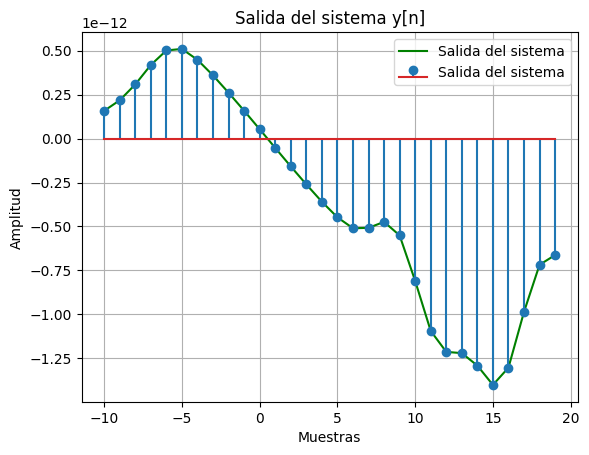

In [15]:
#Convolucion
y_output = np.convolve(x_n, h_n, mode='same')

# Graficamos de la salida
plt.figure()
plt.plot(n, y_output, 'g', label='Salida del sistema')
plt.stem(n, y_output, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()

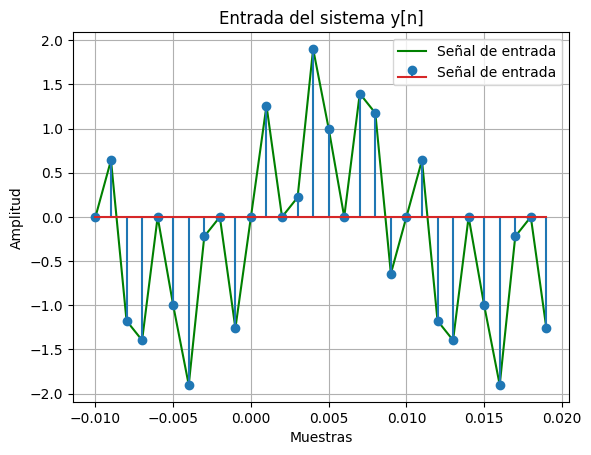

In [16]:
#Se calcula la respuesta con el arreglo t

x_t = np.sin(100 * np.pi * t) + np.sin(600 * np.pi * t) #definimos la señal dada en el problema
#graficamos la señal de entrada
plt.figure()
plt.plot(t, x_t, 'g', label='Señal de entrada')
plt.stem(t, x_t, label='Señal de entrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Entrada del sistema y[n]')
plt.grid()


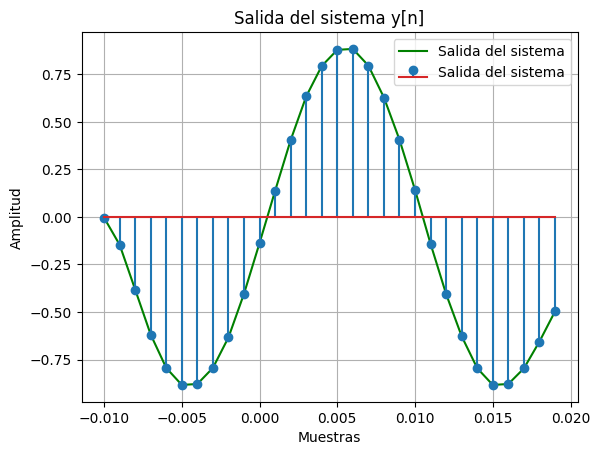

In [17]:
# Realizamos la convolucion
y_out = np.convolve(x_t, h_n, mode='same')

# Graficamos de la salida
plt.figure()
plt.plot(t, y_out, 'g', label='Salida del sistema')
plt.stem(t, y_out, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()